In [3]:
#Config Basico
import logging
log = logging.getLogger(__name__)

def reset_logging():
    """
    Reset logging - Tira as definicoes de DEBUG, INFO, etc
    """
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

        
import importlib, sys, os, requests
from pathlib import Path

[sys.path.append(str(p)) for p in list(Path(os.path.abspath('')).parents) if len(list(Path(p).glob('*.gitignore'))) > 0 ]

# import support_library.common as common
# from support_library.viral import *

def reset_libs():
    _ = [importlib.reload(sys.modules[m]) for m in list(sys.modules) if 'support_library' in m]   
    
reset_libs()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('..\dataset\__by_month_full.csv')
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['date'], ascending=[True], inplace=True)
# df.dtypes
df.head()

,date,reference,coconut_beginning-stocks,coconut_crush,coconut_domestic-consumption,coconut_ending-stocks,coconut_exports,coconut_feed-waste-dom-cons,coconut_food-use-dom-cons,coconut_imports,...,vegetable-oil_total-supply,vegetable-oil_oecd_consumption,vegetable-oil_oecd_ending-stocks,vegetable-oil_oecd_exports,vegetable-oil_oecd_food,vegetable-oil_oecd_food-fat-availability,vegetable-oil_oecd_human-consumption-per-capita,vegetable-oil_oecd_imports,vegetable-oil_oecd_other-use,vegetable-oil_oecd_production
265,2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7273.77,844.92,2541.32,6179.99,2.24,1.02,2490.87,1088.77,7469.76
264,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7298.97,849.93,2562.66,6190.32,2.24,1.02,2504.98,1098.62,7494.42
263,2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7324.16,854.95,2584.01,6200.66,2.24,1.02,2519.10,1108.46,7519.09
262,2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7349.36,859.96,2605.36,6211.00,2.24,1.03,2533.21,1118.31,7543.75
261,2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7374.55,864.97,2626.71,6221.34,2.25,1.03,2547.32,1128.15,7568.42


In [6]:
df = df[[col for col in df.columns if 'sunflower' in col or 'date' in col]]
print(df.shape)
df = df[df['sunflower_exports'].notna()]
print(df.shape)
df = df[df['sunflower_price'].notna()]
print(df.shape)
df.head()

(266, 14)
(253, 14)
(234, 14)


,date,sunflower_beginning-stocks,sunflower_crush,sunflower_domestic-consumption,sunflower_ending-stocks,sunflower_exports,sunflower_feed-waste-dom-cons,sunflower_food-use-dom-cons,sunflower_imports,sunflower_industrial-dom-cons,sunflower_price,sunflower_production,sunflower_total-distribution,sunflower_total-supply
240,2002-02-28,78.10,1541.00,624.62,62.06,166.18,2.35,593.97,153.85,28.31,578.0,620.92,852.86,852.86
239,2002-03-31,76.40,1551.75,625.19,62.54,168.85,2.44,594.17,154.60,28.58,557.0,625.58,856.58,856.58
238,2002-04-30,74.69,1562.50,625.75,63.03,171.53,2.53,594.36,155.36,28.86,552.0,630.25,860.31,860.31
237,2002-05-31,72.99,1573.25,626.31,63.51,174.20,2.62,594.56,156.12,29.14,574.0,634.92,864.03,864.03
236,2002-06-30,71.29,1584.00,626.88,64.00,176.88,2.71,594.75,156.88,29.42,595.0,639.58,867.75,867.75


# Analise preliminar

In [7]:
df.describe().round(2)

,sunflower_beginning-stocks,sunflower_crush,sunflower_domestic-consumption,sunflower_ending-stocks,sunflower_exports,sunflower_feed-waste-dom-cons,sunflower_food-use-dom-cons,sunflower_imports,sunflower_industrial-dom-cons,sunflower_price,sunflower_production,sunflower_total-distribution,sunflower_total-supply
count,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
mean,154.68,2813.85,1097.39,158.49,563.02,5.90,1033.27,489.41,58.23,966.04,1174.82,1818.90,1818.90
std,56.98,759.94,306.58,53.26,284.89,1.02,290.87,251.97,15.30,334.95,331.67,626.68,626.68
min,61.57,1541.00,624.62,62.06,166.18,2.35,593.97,153.85,28.31,543.00,620.92,852.86,852.86
25%,100.12,2157.57,828.61,100.53,329.41,5.65,778.03,279.62,48.05,719.64,886.73,1260.01,1260.01
50%,161.79,2702.04,1061.97,161.79,493.78,6.26,1000.10,448.72,55.22,856.47,1127.38,1780.36,1780.36
75%,203.42,3625.55,1382.23,203.13,867.90,6.65,1302.24,764.54,73.64,1174.51,1528.38,2481.78,2481.78
max,254.17,4182.50,1649.50,254.17,1122.67,7.00,1556.08,978.08,86.42,2045.00,1761.58,2913.58,2913.58


In [8]:
df.corr(method='pearson').round(2)

,sunflower_beginning-stocks,sunflower_crush,sunflower_domestic-consumption,sunflower_ending-stocks,sunflower_exports,sunflower_feed-waste-dom-cons,sunflower_food-use-dom-cons,sunflower_imports,sunflower_industrial-dom-cons,sunflower_price,sunflower_production,sunflower_total-distribution,sunflower_total-supply
sunflower_beginning-stocks,1.00,0.75,0.78,0.86,0.72,0.71,0.78,0.74,0.77,0.26,0.75,0.79,0.79
sunflower_crush,0.75,1.00,1.00,0.68,0.99,0.71,1.00,0.99,0.98,0.11,1.00,1.00,1.00
sunflower_domestic-consumption,0.78,1.00,1.00,0.68,0.99,0.70,1.00,0.99,0.98,0.11,1.00,1.00,1.00
sunflower_ending-stocks,0.86,0.68,0.68,1.00,0.64,0.79,0.68,0.66,0.65,0.35,0.69,0.71,0.71
sunflower_exports,0.72,0.99,0.99,0.64,1.00,0.65,0.99,1.00,0.97,0.05,0.99,0.99,0.99
sunflower_feed-waste-dom-cons,0.71,0.71,0.70,0.79,0.65,1.00,0.70,0.66,0.75,0.53,0.71,0.71,0.71
sunflower_food-use-dom-cons,0.78,1.00,1.00,0.68,0.99,0.70,1.00,0.99,0.98,0.11,1.00,1.00,1.00
sunflower_imports,0.74,0.99,0.99,0.66,1.00,0.66,0.99,1.00,0.97,0.07,1.00,1.00,1.00
sunflower_industrial-dom-cons,0.77,0.98,0.98,0.65,0.97,0.75,0.98,0.97,1.00,0.19,0.98,0.98,0.98
sunflower_price,0.26,0.11,0.11,0.35,0.05,0.53,0.11,0.07,0.19,1.00,0.11,0.11,0.11


Verificado um alta correlação praticamente com todas as variaveis. Exceção é o Preço.

In [7]:
df.corr(method='pearson').round(2)['sunflower_exports'].to_frame()

,sunflower_exports
sunflower_beginning-stocks,0.72
sunflower_crush,0.99
sunflower_domestic-consumption,0.99
sunflower_ending-stocks,0.64
sunflower_exports,1.00
sunflower_feed-waste-dom-cons,0.65
sunflower_food-use-dom-cons,0.99
sunflower_imports,1.00
sunflower_industrial-dom-cons,0.97
sunflower_price,0.05


## Serie

<Figure size 1080x360 with 0 Axes>

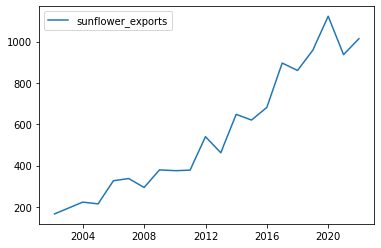

In [8]:
plt.figure(figsize=(15,5));
fig, ax = plt.subplots();
plt.plot(df['date'], df['sunflower_exports'], label='sunflower_exports', );
plt.legend(loc='best');

Text(0, 0.5, 'KTONS')

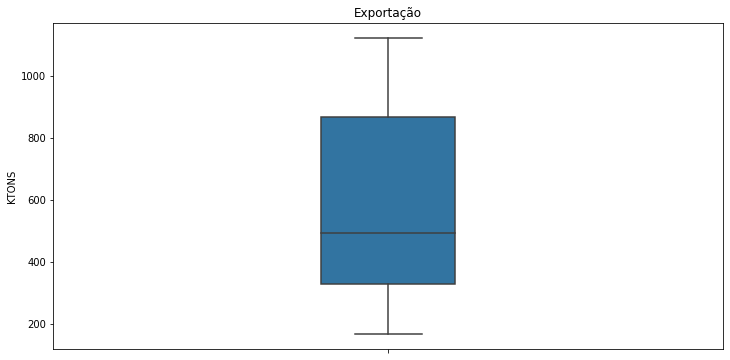

In [9]:
ax = sns.boxplot(y=df['sunflower_exports'], orient='v', width=.2)
ax.figure.set_size_inches(12,6)
ax.set_title("Exportação")
ax.set_ylabel("KTONS")

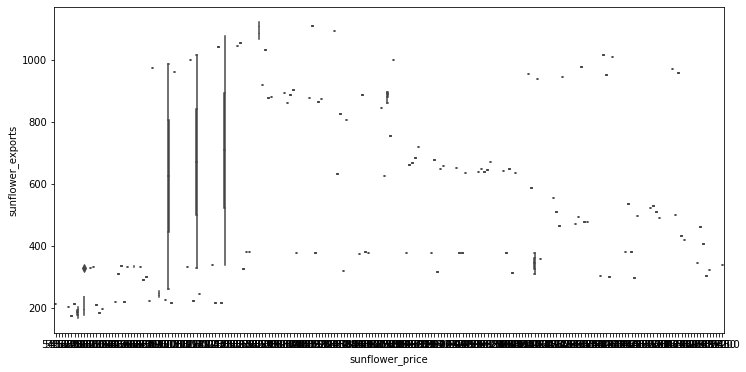

In [10]:
ax = sns.boxplot(data = df, y='sunflower_exports', x='sunflower_price', orient='v', width=.2)
ax.figure.set_size_inches(12,6)

## Distribuição de Frequencia Grafica
Analise informal

E:\Projetos\vegetable_oil_mkt\.env-win-tese\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


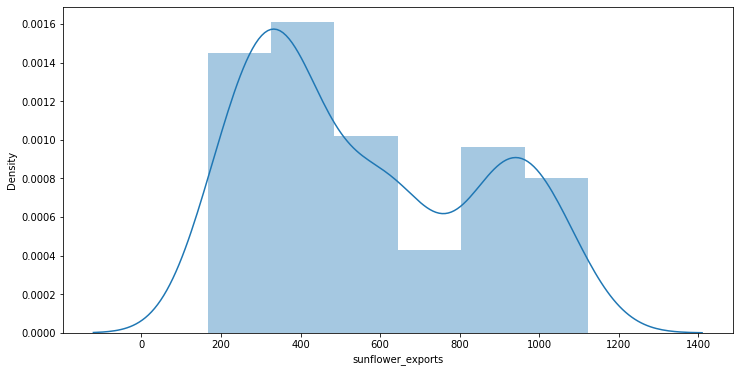

In [11]:
ax = sns.distplot(df['sunflower_exports'])
ax.figure.set_size_inches(12,6);

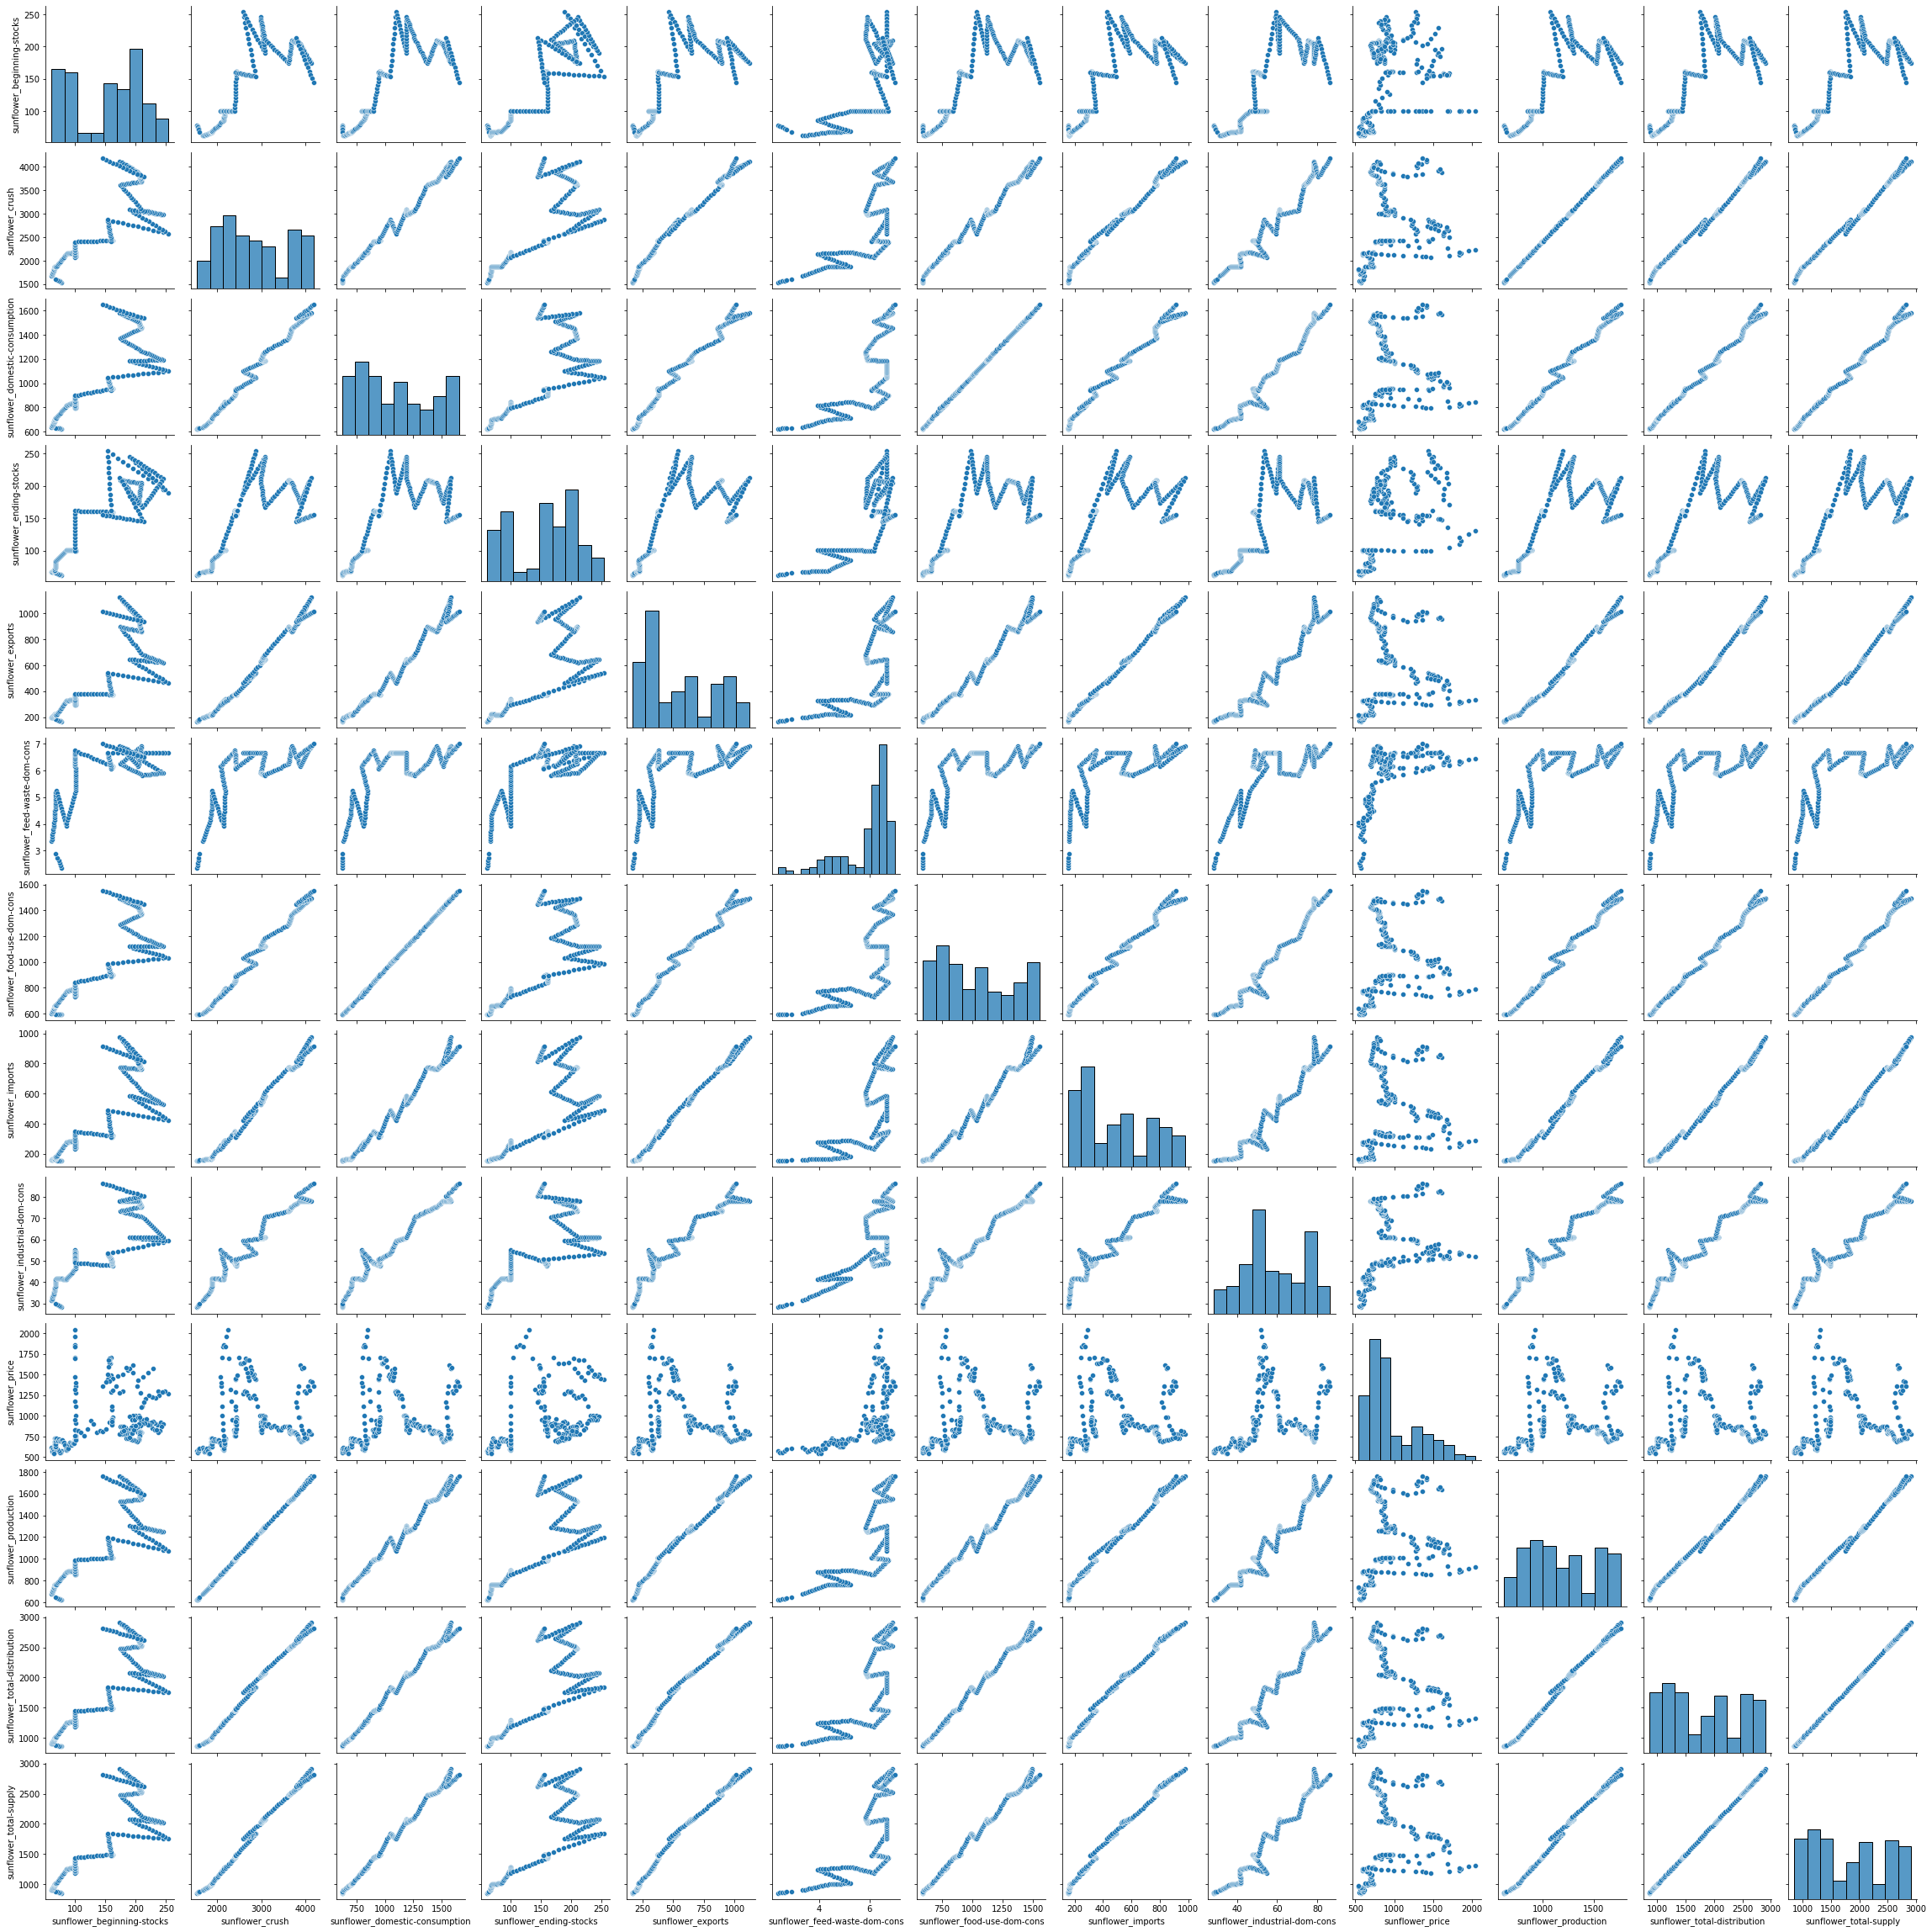

In [12]:
ax = sns.pairplot(df)

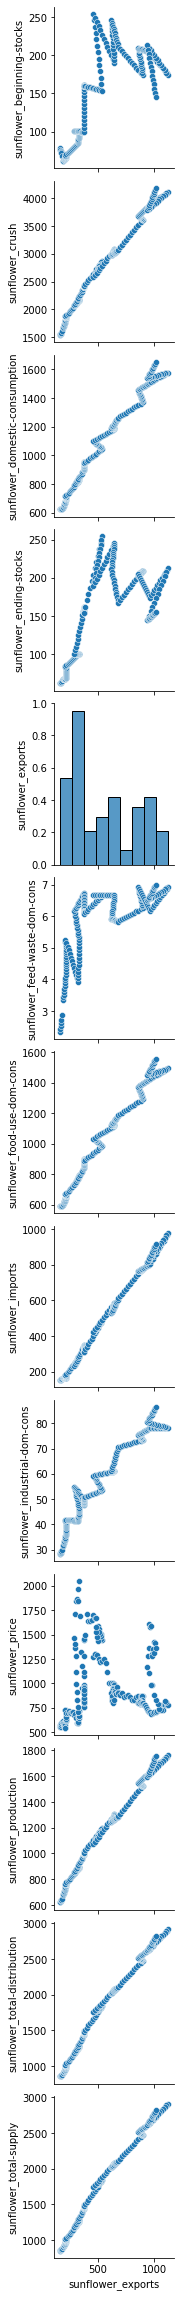

In [13]:
ax = sns.pairplot(df, x_vars='sunflower_exports')
# ax.fig

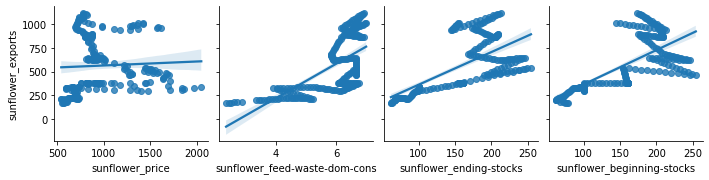

In [14]:
ax = sns.pairplot(df, y_vars='sunflower_exports', 
                  x_vars=['sunflower_price', 'sunflower_feed-waste-dom-cons', 'sunflower_ending-stocks', 'sunflower_beginning-stocks'],
                 kind='reg')

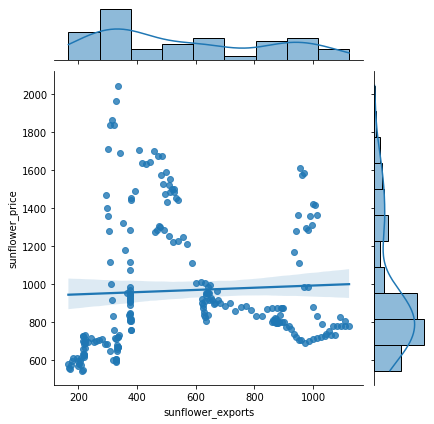

In [15]:
ax = sns.jointplot(y='sunflower_price', x='sunflower_exports', data=df, kind='reg')
ax

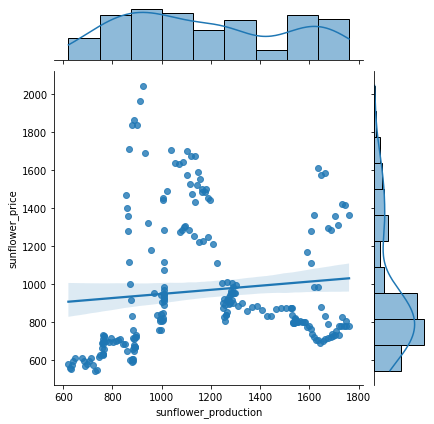

In [16]:
ax = sns.jointplot(y='sunflower_price', x='sunflower_production', data=df, kind='reg')
ax

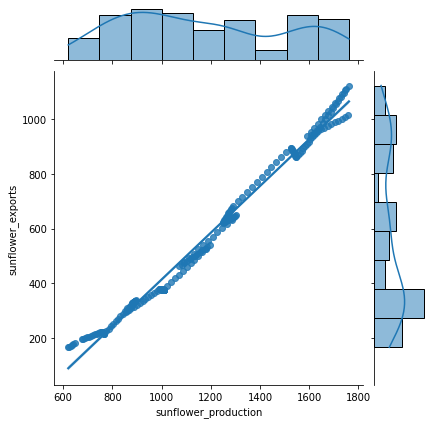

In [52]:
ax = sns.jointplot(y='sunflower_exports', x='sunflower_production', data=df, kind='reg')
ax

# Treino e Teste

In [17]:
from sklearn.model_selection import train_test_split

In [58]:
y = df['sunflower_exports']
X = df[['sunflower_price']]#,'sunflower_production']]

In [59]:
y

240     166.18
239     168.85
238     171.53
237     174.20
236     176.88
        ...   
6       988.22
5       994.67
4      1001.11
3      1007.56
2      1014.00
Name: sunflower_exports, Length: 234, dtype: float64

In [60]:
X.head()

,sunflower_price
240,578.0
239,557.0
238,552.0
237,574.0
236,595.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.08, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')
print(f'Original: {df.shape}')

X_train: (215, 1) | X_test: (19, 1) | y_train: (215,) | y_test: (19,) 
Original: (234, 14)


In [62]:
X_train.head()

,sunflower_price
240,578.0
239,557.0
238,552.0
237,574.0
236,595.0


In [63]:
y_train

240     166.18
239     168.85
238     171.53
237     174.20
236     176.88
        ...   
25     1107.17
24     1091.67
23     1076.17
22     1060.67
21     1045.17
Name: sunflower_exports, Length: 215, dtype: float64

## Regressao

$Y_i=\beta_1+\beta_2X_{2i}+\beta_3X_{3i}+\beta_4X_{4i}+\mu_i$

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [71]:
modelo = LinearRegression()

In [72]:
modelo.fit(X=X_train, y=y_train)

LinearRegression()

In [73]:
print(f'R²: {modelo.score(X=X_train, y=y_train)}')

R²: 0.004258213507891018


In [74]:
print("R²:", modelo.score(X=X_train, y=y_train).round(2) )

R²: 0.0


In [77]:
y_previsto = modelo.predict(X_test)
y_previsto

array([534.23382555, 531.87102494, 529.55251695, 524.00302018,
       524.0548531 , 517.32079227, 514.10915514, 508.51468027,
       503.95623098, 490.85072881, 492.87094706, 492.24932116,
       507.4268745 , 508.20389368, 504.31885048, 506.75346841,
       500.90003987, 501.15899354, 503.99509248])

In [78]:
print(f'R²: { metrics.r2_score(y_test, y_previsto) }')

R²: -328.70168014129825
